In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df.isnull().sum().sum()

0

In [48]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [12]:
df.duplicated().sum()

0

In [57]:
df["customerID"].duplicated().sum()

0

In [58]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#converted 0 and 1 values of SeniorCitizen to yes/no to make it easir to understand

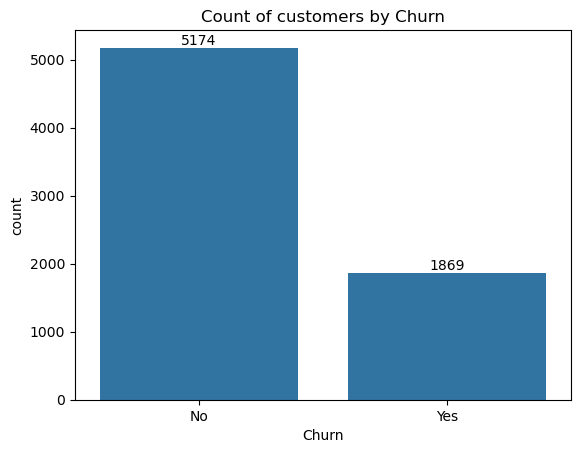

In [59]:
ax = sns.countplot(x = "Churn",data =df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

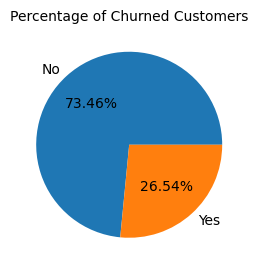

In [60]:
plt.figure(figsize=(3,4))
gb = df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'], labels= gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out #not let's explore the reason behind it

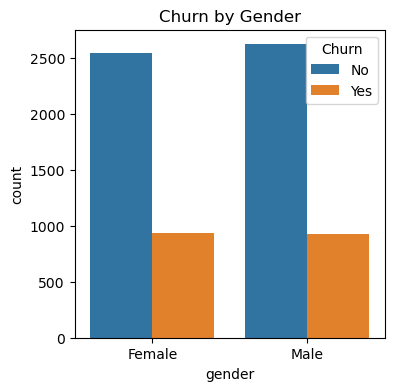

In [61]:
plt.figure(figsize =(4,4))
sns.countplot(x='gender', data = df, hue='Churn')

plt.title("Churn by Gender")
plt.show()

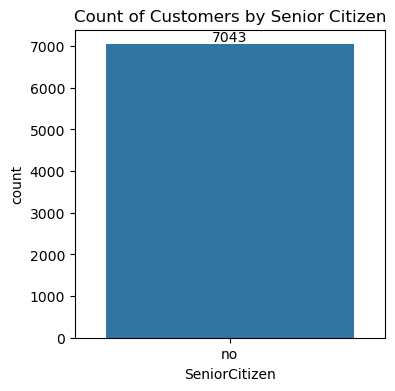

In [62]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

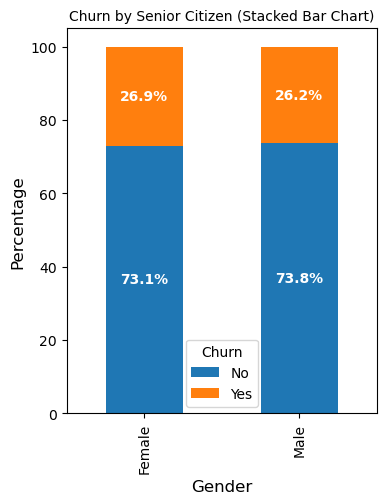

In [72]:
# Group and count
grouped = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
grouped_perc = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot stacked bar chart (blue for No, orange for Yes)
ax = grouped_perc.plot(kind='bar', stacked=True, figsize=(4,5), color=['#1f77b4', '#ff7f0e'])

# Add percentage labels inside each bar
for i, (index, row) in enumerate(grouped_perc.iterrows()):
    cumulative = 0
    for churn_status, value in row.items():
        plt.text(i, cumulative + value/2, f'{value:.1f}%',
                 ha='center', va='center', fontsize=10, color='white', fontweight='bold')
        cumulative += value

# Chart labels
plt.title("Churn by Senior Citizen (Stacked Bar Chart)", fontsize=10)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.legend(title="Churn")
plt.show()

#comparative a greater percentage of people in senior citizen category have churned

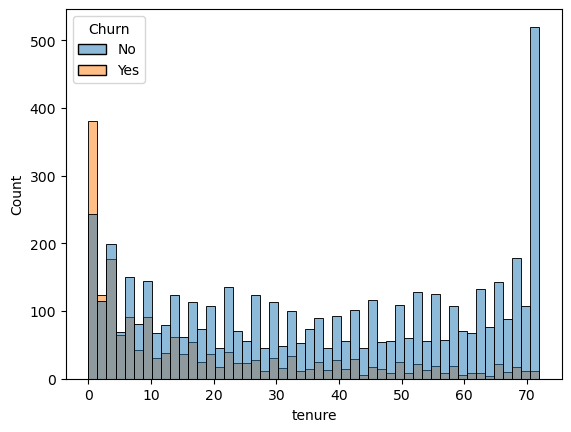

In [76]:
plt.figure(figure =(9,4))
sns.histplot(x = "tenure", data=df ,bins=50 , hue='Churn')
plt.show()

#people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

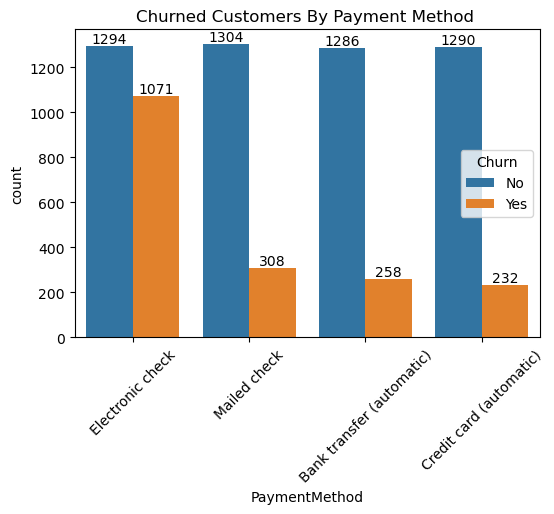

In [80]:
plt.figure(figsize =(6,4))
ax = sns.countplot(x='PaymentMethod', data = df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers By Payment Method ")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronics check as a payment method